In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("IMDb Movies India.csv")

print(data.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [7]:
print(data.describe)

<bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Vot

In [8]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [9]:
data.drop(columns='Duration', inplace=True)

In [10]:
data['Year'] = data['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'].fillna(0, inplace=True)
data['Year'] = data['Year'].astype(int)

In [11]:
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
data['Rating'].fillna(0, inplace=True)
data['Votes'] = data['Votes'].astype(str).str.replace(',', '', regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'].fillna(0, inplace=True)

In [13]:
numerical_columns = ['Year', 'Votes', 'Rating']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)


In [14]:
print("Remaining NaNs in numerical columns:")
print(data[numerical_columns].isnull().sum())

Remaining NaNs in numerical columns:
Year      0
Votes     0
Rating    0
dtype: int64


In [15]:
q1 = np.percentile(data['Votes'], 25)
q3 = np.percentile(data['Votes'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Votes'] >= lower_bound) & (data['Votes'] <= upper_bound)]

In [16]:
categorical_columns = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

top_n = 20
for col in categorical_columns:
    top_categories = data[col].value_counts().nlargest(top_n).index
    data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')

data['Director_Avg_Rating'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor_1_Popularity'] = data.groupby('Actor 1')['Actor 1'].transform('count')


In [17]:
# Handle missing values
data['Director_Avg_Rating'].fillna(data['Director_Avg_Rating'].median(), inplace=True)
data['Actor_1_Popularity'].fillna(data['Actor_1_Popularity'].median(), inplace=True)



encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate encoded columns back to the dataset
data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

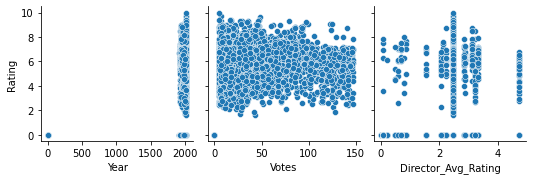

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot relationships between features and target
sns.pairplot(data, x_vars=['Year', 'Votes', 'Director_Avg_Rating'], y_vars='Rating', kind='scatter')
plt.show()

In [19]:
X = data[['Year', 'Votes', 'Director_Avg_Rating', 'Actor_1_Popularity']]
y = data['Rating']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=0.80)  # Retain 80% of the variance
X_pca_reduced = pca.fit_transform(X_scaled)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6633909198756832
R-squared: 0.9234249008133695


In [24]:
y_train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2}')

# Evaluate on test data
test_r2 = r2_score(y_test, y_pred)
print(f'Test R²: {test_r2}')

Training R²: 0.9761056713854227
Test R²: 0.9234249008133695


In [25]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean R²: {scores.mean()}')

Cross-Validation R² Scores: [0.92679897 0.92890503 0.91775484 0.92507602 0.92406873]
Mean R²: 0.9245207173822049
